**IMPORTAMOS LAS LIBRERIAS**

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import csv
import statsmodels.api as sm
import scipy.stats as stats

import copy

**LEER EL DATASET**

In [3]:
with open("/content/dionaeaClean2.csv") as data_file:
    # it akes the file and read it and output the data
    data=csv.reader(data_file)
    #it create an csv.reader object that can be iterable to loop throught
    dic={}
    count=0
    cabecera=[]
    valor_1=[]
    for row in data :
        if count==0:
          cabecera=row
          for dato in range(len(row)):
            dic[cabecera[dato]]=[]
          count+=1
          continue
        if count==1:
          count+=1
          for valor_dic in range(len(cabecera)):
            dic[cabecera[valor_dic]]=[row[valor_dic]]
          continue
        for valor_dic in range(len(cabecera)):
          dic[cabecera[valor_dic]].append(row[valor_dic])




In [4]:
df=pd.DataFrame(dic)
df.head()

,protocol,transport,type,dst_port,src_ip,src_port,timestamp
0,smbd,tcp,accept,445,62.74.213.178,1176,2022-05-07T15:08:48.091297
1,smbd,tcp,accept,445,62.74.213.178,1202,2022-05-07T15:08:48.869184
2,smbd,tcp,accept,445,62.74.213.178,1255,2022-05-07T15:08:50.198560
3,smbd,tcp,accept,445,62.74.213.178,1283,2022-05-07T15:08:50.904213
4,smbd,tcp,accept,445,62.74.213.178,1313,2022-05-07T15:08:51.603572


In [9]:
df.shape#las dimensiones del dataframe

(27574, 8)

In [10]:
df.info()#obtenemos la informacion sobre el tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27574 entries, 0 to 27573
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   protocol    27574 non-null  object        
 1    transport  27574 non-null  object        
 2    type       27574 non-null  object        
 3    dst_port   27574 non-null  object        
 4    src_ip     27574 non-null  object        
 5    src_port   27574 non-null  object        
 6    timestamp  27574 non-null  datetime64[ns]
 7   HOUR        27574 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.7+ MB


**VERIFICAMOS VALORES FALTANTES**

In [11]:
df.isna().sum()#observamos los valors no nulos

protocol      0
 transport    0
 type         0
 dst_port     0
 src_ip       0
 src_port     0
 timestamp    0
HOUR          0
dtype: int64

In [12]:
#cambiamos el tipo de dato a datatime para que sea mas facil de manejar
df[' timestamp']= pd.to_datetime(df[' timestamp'], format="%Y-%m-%dT%H:%M:%S.%f")
hora=[]
for x in df[' timestamp']:
    hora.append(x.hour)
df['HOUR']=hora


In [13]:
df.head()

,protocol,transport,type,dst_port,src_ip,src_port,timestamp,HOUR
0,smbd,tcp,accept,445,62.74.213.178,1176,2022-05-07 15:08:48.091297,15
1,smbd,tcp,accept,445,62.74.213.178,1202,2022-05-07 15:08:48.869184,15
2,smbd,tcp,accept,445,62.74.213.178,1255,2022-05-07 15:08:50.198560,15
3,smbd,tcp,accept,445,62.74.213.178,1283,2022-05-07 15:08:50.904213,15
4,smbd,tcp,accept,445,62.74.213.178,1313,2022-05-07 15:08:51.603572,15


**ANALISIS DESCRIPTIVO**

In [14]:
df.describe().T#obtenemos un analisis estadistico de los valores del dataframe

,count,mean,std,min,25%,50%,75%,max
HOUR,27574.0,17.858272,4.96394,0.0,17.0,18.0,22.0,23.0


<Axes: xlabel='HOUR'>

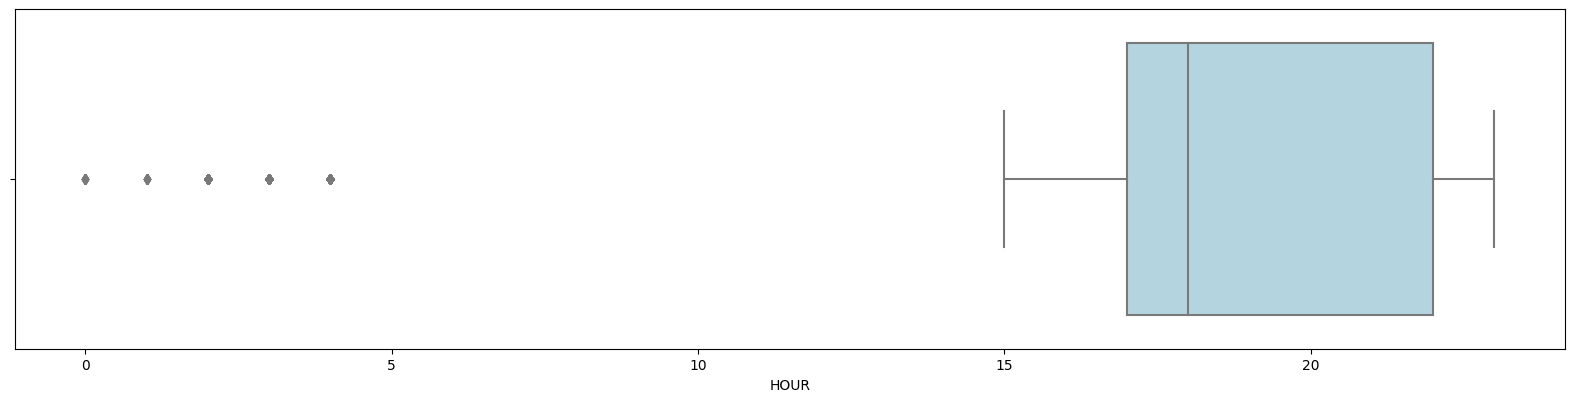

In [ ]:
plt.figure(figsize= (20,15))
sns.boxplot(x= df['HOUR'], color='lightblue')


observamos que el 50% de los ataques se realizaron durante las 5pm a 10pm

**Protocolos**

In [15]:
df['protocol'].value_counts()#obtenemos los protocolos y su conteo

smbd        27433
mssqld         62
httpd          48
mysqld          8
pptpd           6
ftpd            5
mongod          5
epmapper        5
mqttd           2
Name: protocol, dtype: int64

Text(0, 0.5, 'frecuencia')

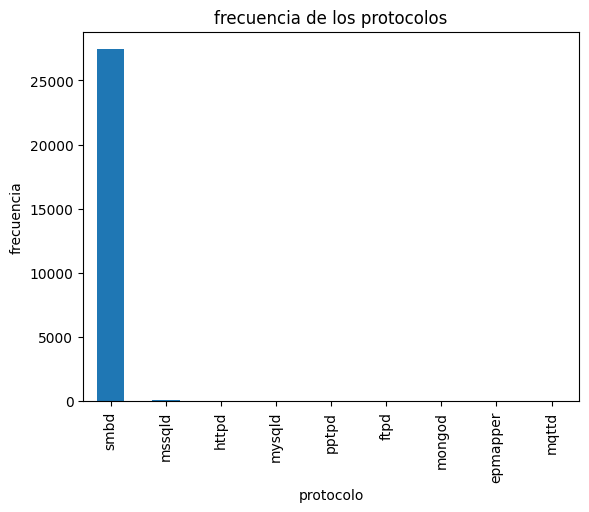

In [16]:
df['protocol'].value_counts().plot(kind='bar')
plt.title('frecuencia de los protocolos')
plt.xlabel("protocolo")
plt.ylabel("frecuencia")

El protocolo "Smbd" es el mas frecuente en el dataset , este protocolo es el Server Message Block (SMB), que se utiliza para compartir archivos e impresoras en redes, tambien tenemos que los protocolos  "mssqld", "httpd" y "mysqld", tienen un número mucho menor de ocurrencias.

**Transporte**

In [17]:
df[' transport'].value_counts()#verificamos los metodos de transporte que se estan utilizando

 tcp    27574
Name:  transport, dtype: int64

EL protocolo de transporte "tcp" es el unico mencionado en el dataset


**Puertos de destino**

In [18]:
df[' dst_port'].value_counts()#obtenemos los puertos de destino que estan utilizando

 445      27433
 1433        62
 81          48
 3306         8
 1723         6
 21           5
 27017        5
 135          5
 1883         2
Name:  dst_port, dtype: int64

Text(0, 0.5, 'frecuencia')

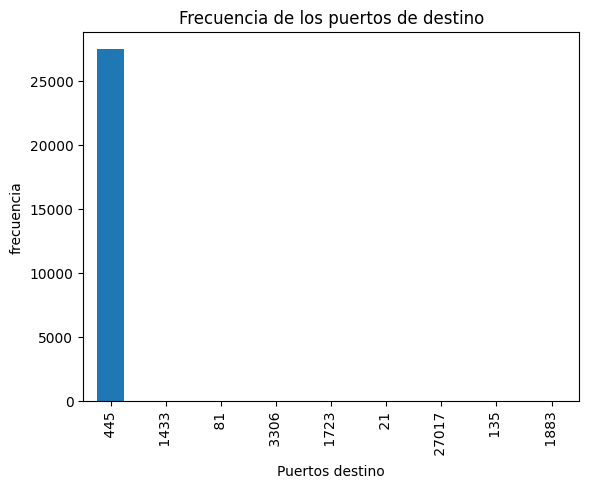

In [19]:
df[' dst_port'].value_counts().plot(kind='bar')
plt.title('Frecuencia de los puertos de destino')
plt.xlabel('Puertos destino')
plt.ylabel('frecuencia')


La alta frecuencia del puerto 445 indica que hubo una gran cantidad de conexiones dirigidas a ese puerto específico, que es comúnmente utilizado por el servicio SMB.

**Ip de origen**

In [20]:
df[' src_ip'].value_counts()

 62.74.213.178      8383
 201.65.241.162     3150
 186.176.210.229    3148
 197.51.208.32      3147
 80.75.161.98       3145
                    ... 
 71.6.135.131          1
 198.235.24.159        1
 104.206.128.22        1
 192.241.221.109       1
 205.210.31.146        1
Name:  src_ip, Length: 101, dtype: int64

<Axes: >

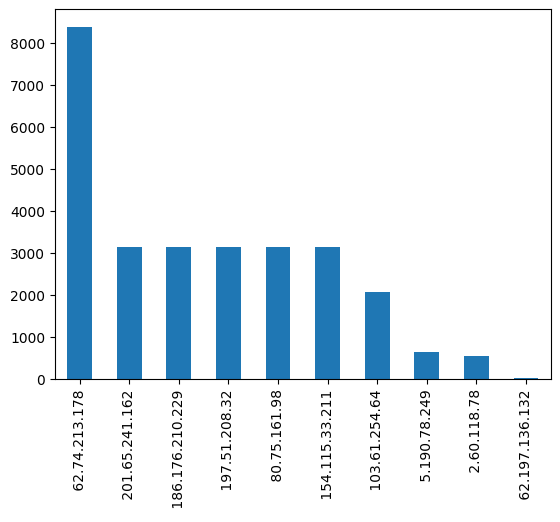

In [21]:
df[' src_ip'].value_counts().head(10).plot(kind='bar')

Tenemos 101 Ip unicas
,a
lgunas direcciones IP tienen una frecuencia significativamente mayor que otras, lo que indica una mayor actividad o tráfico proveniente de esas direcciones específicas.

In [25]:
ip_values = df[' src_ip'].value_counts().head(10).index.tolist()
horas_conexion = {}
for ip in ip_values:

    ip_data = df[df[' src_ip'] == ip]


    horas = ip_data['HOUR'].tolist()


    horas_conexion[ip] = horas


for ip, horas in horas_conexion.items():
    print(f"IP: {ip} - Horas de conexión: {list(set(horas))}")


IP:  62.74.213.178 - Horas de conexión: [15, 17, 18, 21, 22]
IP:  201.65.241.162 - Horas de conexión: [17, 18]
IP:  186.176.210.229 - Horas de conexión: [22, 23]
IP:  197.51.208.32 - Horas de conexión: [18]
IP:  80.75.161.98 - Horas de conexión: [21, 22]
IP:  154.115.33.211 - Horas de conexión: [18, 19, 20]
IP:  103.61.254.64 - Horas de conexión: [2, 3, 4]
IP:  5.190.78.249 - Horas de conexión: [16]
IP:  2.60.118.78 - Horas de conexión: [20]
IP:  62.197.136.132 - Horas de conexión: [16, 17, 19, 0]


se obtuvo las direcciones de ip  que tienen mas frecuencia con la lista de su hora de conexion

**Puerto de origen**

In [24]:
df[' src_port'].value_counts()

 1639     8
 3074     8
 3338     8
 3387     8
 1518     8
         ..
 50473    1
 50482    1
 50520    1
 50523    1
 60220    1
Name:  src_port, Length: 17582, dtype: int64



Tenemos 17582 puertos de origen diferentes, al igual que con las direcciones IP de origen, algunos puertos tienen una frecuencia mucho mayor que otros.